## Athletes BMI
I was wondering the other day how reliable BMI is as an indicator of health. I remembered that some NZ rugby players had high BMIs, so wanted to see how it extended to other sports.

I found a dataset of Olympian height/weight/etc. [here](https://www.topendsports.com/events/summer/images/all-rio-2016-athletes-excel.xlsx) linked by [this page](https://www.topendsports.com/events/summer/science/anthropometry-2016.htm) (which has done some analysis of it's own, incidentally)

The distribution and binning into categories turned out to be as expected. Yep, some world-class athletes are indeed categorised outside of healthy BMI ranges.

Narratives you could spin from this include:
- Out-of-band BMI does not categorically mean one is "unhealthy" because the data is on Olympians; Olympians are widely considered exceptionally healthy.
- Certain sports encourage "unhealthy" physiologies for competition (see: "underweight" gymnasts, triathletes; "obese" wrestlers)
- BMI does not indicate overall health; neither does being an Olympian.
- Olympians are mostly considered healthy by BMI, therefore BMI is a good predictor of health.

BMI has long been viewed as an inadequate single metric for overall physical health. This makes intuitive sense to me; "health" as a quality feels nebulous. However, with not many more features (blood pressure, cholesterol level, etc.), I wonder if we couldn't get a fairly good classifier?

Having an eight-dimensional lookup table in your GP's office does sound like a hard sell, though. Perhaps let's leave this up to the doctors. I'm sure many a thesis has been written on health predictors.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)

In [37]:
df = pd.read_excel("data/all-rio-2016-athletes-excel.xlsx")

In [38]:
df

,name,sport,nationality,sex,date_of_birth,age (at start of games),height (m),weight (kg),BMI,gold,silver,bronze
0,A Jesus Garcia,athletics,ESP,male,1969-10-17,46.832877,1.72,64.0,21.633315,0,0,0
1,A Lam Shin,fencing,KOR,female,1986-09-23,29.887671,1.68,56.0,19.841270,0,0,0
2,Aaron Brown,athletics,CAN,male,1992-05-27,24.208219,1.98,79.0,20.151005,0,0,1
3,Aaron Cook,taekwondo,MDA,male,1991-01-02,25.608219,1.83,80.0,23.888441,0,0,0
4,Aaron Gate,cycling,NZL,male,1990-11-26,25.709589,1.81,71.0,21.672110,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,Zsuzsanna Jakabos,aquatics,HUN,female,1989-04-03,27.358904,1.85,70.0,20.452885,0,0,0
11534,Zurabi Datunashvili,wrestling,GEO,male,1991-06-18,25.150685,1.83,75.0,22.395413,0,0,0
11535,Zurabi Iakobishvili,wrestling,GEO,male,1992-02-04,24.517808,1.71,68.0,23.255019,0,0,0
11536,Zurian Hechavarria,athletics,CUB,female,1995-08-10,21.002740,1.64,58.0,21.564545,0,0,0


[Text(0, 10, '544'),
 Text(0, 10, '8245'),
 Text(0, 10, '1702'),
 Text(0, 10, '245'),
 Text(0, 10, '122')]

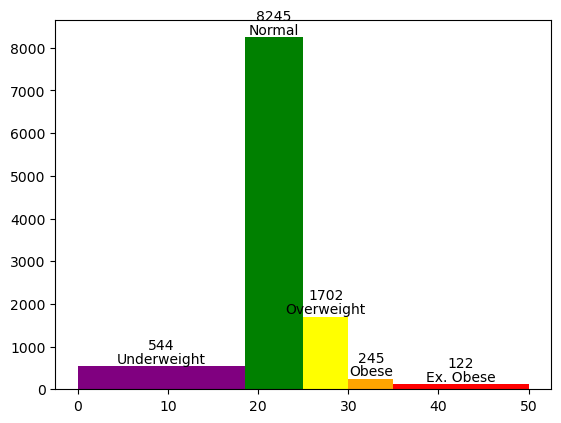

In [39]:
x = df['BMI']

fig, ax = plt.subplots()
cnts, values, bars = ax.hist(x,bins=[0,18.5,25,30,35,50])

clist = ['purple', 'green', 'yellow', 'orange', 'red']

bar_names = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Ex. Obese']


for i in range(len(bars)):
    bars[i].set_facecolor(clist[i])

rects = ax.patches
labels = bar_names
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
  
plt.bar_label(bars,padding = 10)